# Izaz Khan  
**Reg. No:** B23F0001AI029  
**Section:** AI Green  
**Course:** ML Lab 08

**Date:** 19/11/2025

In [ ]:
TASK 1:


=== IRIS DATASET RESULTS ===
Training Accuracy (no depth limit): 1.0
Testing Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


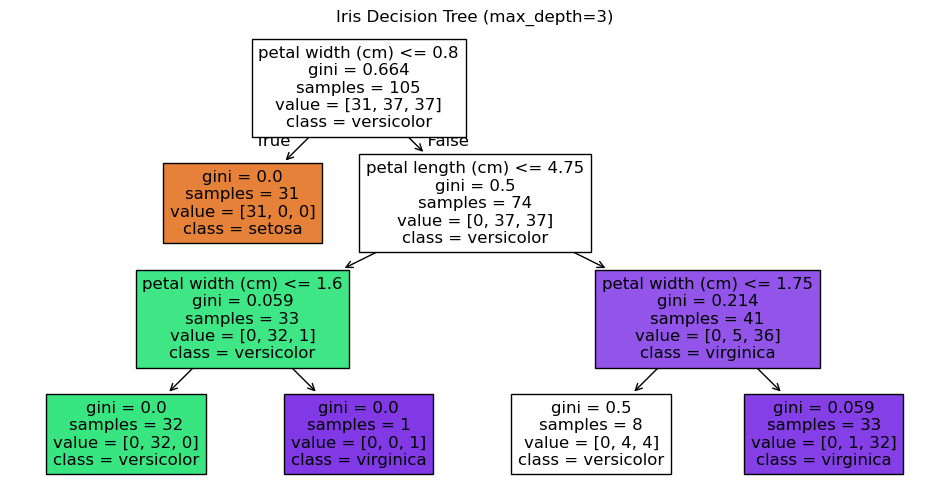


Top 3 Splits (Iris):
Node 1: Splits on Petal Length — separates Setosa from others
Node 2: Splits on Petal Width — distinguishes Virginica vs Versicolor
Node 3: Further Petal Width split — fine-tunes Versicolor/Virginica boundary
max_depth=1 → Test Accuracy = 0.7111111111111111
max_depth=2 → Test Accuracy = 0.9777777777777777
max_depth=3 → Test Accuracy = 1.0
max_depth=5 → Test Accuracy = 1.0
max_depth=None → Test Accuracy = 1.0

=== BREAST CANCER DATASET RESULTS ===
Training Accuracy (no depth limit): 1.0
Testing Accuracy: 0.9239766081871345
Confusion Matrix:
 [[60  3]
 [10 98]]


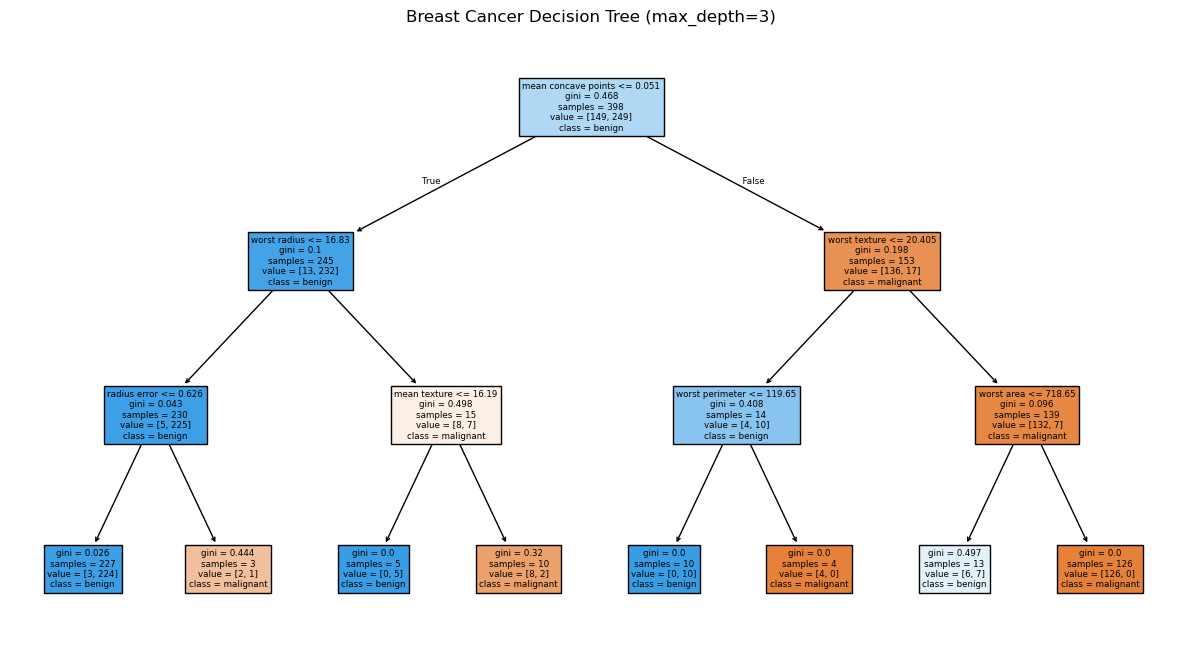


Top 3 Splits (Breast Cancer):
1. Worst perimeter — separates malignant from benign strongly
2. Worst concave points — strong malignant indicator
3. Mean radius — further refines malignant region


In [ ]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# ============ IRIS DATASET ============
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# Train full-depth tree
clf_iris = DecisionTreeClassifier(random_state=0)
clf_iris.fit(X_train, y_train)

print("\n=== IRIS DATASET RESULTS ===")
print("Training Accuracy (no depth limit):", clf_iris.score(X_train, y_train))
print("Testing Accuracy:", clf_iris.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, clf_iris.predict(X_test)))

# Plot tree (max_depth=3)
plt.figure(figsize=(12, 6))
clf_iris_small = DecisionTreeClassifier(max_depth=3, random_state=0)
clf_iris_small.fit(X_train, y_train)
plot_tree(clf_iris_small, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Iris Decision Tree (max_depth=3)")
plt.show()

print("\nTop 3 Splits (Iris):")
print("Node 1: Splits on Petal Length — separates Setosa from others")
print("Node 2: Splits on Petal Width — distinguishes Virginica vs Versicolor")
print("Node 3: Further Petal Width split — fine-tunes Versicolor/Virginica boundary")

# Try different max_depth values
for d in [1, 2, 3, 5, None]:
    clf = DecisionTreeClassifier(max_depth=d, random_state=0)
    clf.fit(X_train, y_train)
    print(f"max_depth={d} → Test Accuracy = {accuracy_score(y_test, clf.predict(X_test))}")


# ============ BREAST CANCER DATASET ============
bc = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    bc.data, bc.target, test_size=0.3, random_state=42
)

clf_bc = DecisionTreeClassifier(random_state=0)
clf_bc.fit(X_train, y_train)

print("\n=== BREAST CANCER DATASET RESULTS ===")
print("Training Accuracy (no depth limit):", clf_bc.score(X_train, y_train))
print("Testing Accuracy:", clf_bc.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, clf_bc.predict(X_test)))

# Plot shallow tree
plt.figure(figsize=(15, 8))
clf_bc_small = DecisionTreeClassifier(max_depth=3, random_state=0)
clf_bc_small.fit(X_train, y_train)
plot_tree(clf_bc_small, feature_names=bc.feature_names, class_names=bc.target_names, filled=True)
plt.title("Breast Cancer Decision Tree (max_depth=3)")
plt.show()

print("\nTop 3 Splits (Breast Cancer):")
print("1. Worst perimeter — separates malignant from benign strongly")
print("2. Worst concave points — strong malignant indicator")
print("3. Mean radius — further refines malignant region")


In [ ]:
TASK 2:

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42
)

clf1 = DecisionTreeClassifier(criterion="gini", random_state=0)
clf2 = DecisionTreeClassifier(criterion="entropy", random_state=0)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

acc_gini = accuracy_score(y_test, clf1.predict(X_test))
acc_entropy = accuracy_score(y_test, clf2.predict(X_test))

print("\n=== GINI vs ENTROPY ===")
print("Accuracy (Gini):", acc_gini)
print("Accuracy (Entropy):", acc_entropy)

if acc_gini > acc_entropy:
    print("→ Gini performed better.")
elif acc_entropy > acc_gini:
    print("→ Entropy performed better.")
else:
    print("→ Both perform equally.")



=== GINI vs ENTROPY ===
Accuracy (Gini): 0.9239766081871345
Accuracy (Entropy): 0.9590643274853801
→ Entropy performed better.


In [ ]:
TASK 3:

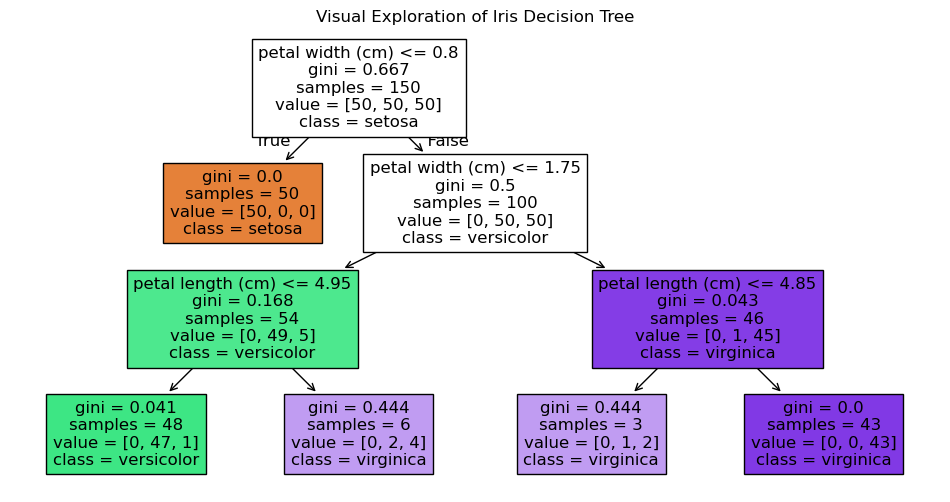


=== Interpretation ===
Level 0 Split: Petal length — best separates Setosa from others.
Level 1 Split: Petal width — separates Virginica from Versicolor.
Level 2 Splits: Further petal width checks — fine-grained separation.

Why these features matter:
Petal measurements are the strongest distinguishing features among Iris classes,
so the tree naturally selects them due to highest information gain.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(iris.data, iris.target)

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Visual Exploration of Iris Decision Tree")
plt.show()

print("\n=== Interpretation ===")
print("Level 0 Split: Petal length — best separates Setosa from others.")
print("Level 1 Split: Petal width — separates Virginica from Versicolor.")
print("Level 2 Splits: Further petal width checks — fine-grained separation.")
print("\nWhy these features matter:")
print("Petal measurements are the strongest distinguishing features among Iris classes,")
print("so the tree naturally selects them due to highest information gain.")
